### Steven Raaijmakers 10804242 & Marcus van Bergen 10871993

### Histogram Equalization

#### 1
ψ(v) = H(v) * m

#### 2 

In [1]:
from scipy import ndimage
from numpy import histogram, interp, cumsum, amin, amax
from __future__ import division, print_function
from scipy.misc import imshow, imread
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# map [0, 255] to [n, m]
def i2f(f):
    fmin = amin(f)
    fmax = amax(f)
    return (f - fmin) / (fmax - fmin)

# given
def histogramEqualization(f, bins=100):
    his, be = histogram(f, range=(0,1), bins=bins)
    his = his.astype(float)/sum(his)
    return interp(f, be[1:], cumsum(his))

HE = histogramEqualization(i2f([i for i in range(0, 256)]))

Unedited version of cameraman:

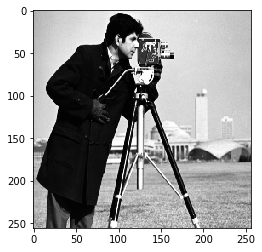

In [5]:
f = ndimage.imread("images/cameraman.png")
plt.imshow(f, cmap="gray")
plt.show()

Histogram equalization for camerman.png

In [ ]:
# print(HE[np.ravel(f)])

f2 = histogramEqualization(i2f(f))
plt.imshow(f2, cmap="gray")
plt.show()

In [ ]:
for x in range(1, 4):
    path = "data/views/"+"view" + str(x) + ".jpg"
    view1 = ndimage.imread(path)
    plt.imshow(view1, cmap="gray")
    plt.show()

    view1_h = histogramEqualization(i2f(view1))
    plt.imshow(view1_h, cmap="gray")
    plt.show()
    x = x + 1

#### 3

In [ ]:
f = imread('data/SkinColor/FacePhoto/0520962400.jpg')
m = imread('data/SkinColor/GroundT_FacePhoto/0520962400.png')

plt.subplot(121)

plt.imshow(f)

plt.subplot(122)

plt.imshow(m)
plt.show()

In [ ]:
skincolors = f[m[:,:,0]==255]
nonskincolors = f[m[:,:,0]==0]

Create sample sets:

In [ ]:
def get_rc(array, size=500):
    return array[np.random.choice([i for i in range(len(array))], size)]

sample_s = get_rc(skincolors)
sample_n = get_rc(nonskincolors)

Plot sample points (red = skincolor, blue = nonskincolor). RGB mapped to XYZ

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(sample_s[:,0], sample_s[:,1], sample_s[:,2], color="red")
ax.scatter(sample_n[:,0], sample_n[:,1], sample_n[:,2], color="blue")
plt.show()

In [ ]:
color = np.vstack((skincolors, nonskincolors))
target = np.concatenate((np.ones(len(skincolors)),np.zeros(len(nonskincolors))))

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

learn_color = color[1::2]
test_color = color[0::2]

learn_target = target[1::2]
test_target = target[0::2]

logregr = LogisticRegressionCV()

logregr.fit(learn_color, learn_target)
logregr.score(test_color, test_target)

In [ ]:
image_colors = f.reshape((-1,3))

predict_skin = logregr.predict(image_colors).reshape(f.shape[:2])

plt.subplot(121)

plt.imshow(f)

plt.subplot(122)

plt.imshow(predict_skin)

plt.show()

Convert RGB values from sample sets to LAB, and plot AB.

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from skimage.color import rgb2lab

skin = rgb2lab([skincolors])[0]
non = rgb2lab([nonskincolors])[0]

s_a = skin[:,1]
s_b = skin[:,2]
n_a = non[:,1]
n_b = non[:,2]

plt.scatter(s_a, s_b, color="red")
plt.scatter(n_a, n_b, color="blue")
plt.show()

Logistic regression via LAB:

In [4]:
from skimage.color import rgb2lab
# take second and third column 
sample_s_ab = rgb2lab([skincolors])[0][:,[1,2]]
sample_n_ab = rgb2lab([nonskincolors])[0][:,[1,2]]
#sample_s_ab = rgb2lab([sample_s])[0][:,[1,2]]
#sample_n_ab = rgb2lab([sample_n])[0][:,[1,2]]

# logistic regression over sample sets:
color = np.vstack((sample_s_ab, sample_n_ab))
target = np.concatenate((np.ones(len(sample_s_ab)),np.zeros(len(sample_n_ab))))

learn_color = color[1::2]
learn_target = target[1::2]
test_color = color[0::2]
test_target = target[0::2]
logregr = LogisticRegressionCV()
logregr.fit(learn_color, learn_target)

logregr.score(test_color, test_target)


NameError: name 'skincolors' is not defined

In [ ]:
image_colors = f.reshape((-1,3))
image_colors = rgb2lab([image_colors])[0]
image_colors_ab = image_colors[:,[1,2]]

predict_skin = logregr.predict(image_colors_ab)
predict_skin = predict_skin.reshape(f.shape[:2])

plt.subplot(121)
plt.imshow(f)
plt.subplot(122)
plt.imshow(predict_skin)
plt.show()

In [ ]:
from scipy import ndimage
from numpy import histogram, interp, cumsum, amin, amax
from __future__ import division, print_function
from scipy.misc import imshow, imread
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


def get_rc(array, size=500):
    return array[np.random.choice([i for i in range(len(array))], size)]

def runner(x):
    
    j = str(x).replace("jpg", "png")
    j = str(j).replace("FacePhoto", "GroundT_FacePhoto")
    
    path = str(x)
    path_png = str(j)
    
       
    f = imread(path)
    m = imread(path_png)

    plt.subplot(121)

    plt.imshow(f)

    plt.subplot(122)

    plt.imshow(m)
    plt.show()

    skincolors = f[m[:,:,0]==255]
    nonskincolors = f[m[:,:,0]==0]

    sample_s = get_rc(skincolors)
    sample_n = get_rc(nonskincolors)

    from mpl_toolkits.mplot3d import Axes3D

    fig = plt.figure()
    ax = Axes3D(fig)

    ax.scatter(sample_s[:,0], sample_s[:,1], sample_s[:,2], color="red")
    ax.scatter(sample_n[:,0], sample_n[:,1], sample_n[:,2], color="blue")
    plt.show()

    color = np.vstack((skincolors, nonskincolors))
    target = np.concatenate((np.ones(len(skincolors)),np.zeros(len(nonskincolors))))

    from sklearn.linear_model import LogisticRegressionCV

    learn_color = color[1::2]
    test_color = color[0::2]

    learn_target = target[1::2]
    test_target = target[0::2]

    logregr = LogisticRegressionCV()

    logregr.fit(learn_color, learn_target)
    logregr.score(test_color, test_target)

    image_colors = f.reshape((-1,3))

    predict_skin = logregr.predict(image_colors).reshape(f.shape[:2])

    plt.subplot(121)

    plt.imshow(f)

    plt.subplot(122)

    plt.imshow(predict_skin)

    plt.show()

    from sklearn.linear_model import LogisticRegressionCV
    from skimage.color import rgb2lab

    skin = rgb2lab([skincolors])[0]
    non = rgb2lab([nonskincolors])[0]

    s_a = skin[:,1]
    s_b = skin[:,2]
    n_a = non[:,1]
    n_b = non[:,2]

    plt.scatter(s_a, s_b, color="red")
    plt.scatter(n_a, n_b, color="blue")
    plt.show()
    # take second and third column 
    sample_s_ab = rgb2lab([skincolors])[0][:,[1,2]]
    sample_n_ab = rgb2lab([nonskincolors])[0][:,[1,2]]
    #sample_s_ab = rgb2lab([sample_s])[0][:,[1,2]]
    #sample_n_ab = rgb2lab([sample_n])[0][:,[1,2]]

    # logistic regression over sample sets:
    color = np.vstack((sample_s_ab, sample_n_ab))
    target = np.concatenate((np.ones(len(sample_s_ab)),np.zeros(len(sample_n_ab))))

    learn_color = color[1::2]
    learn_target = target[1::2]
    test_color = color[0::2]
    test_target = target[0::2]
    logregr = LogisticRegressionCV()
    logregr.fit(learn_color, learn_target)

    logregr.score(test_color, test_target)
    image_colors = f.reshape((-1,3))
    image_colors = rgb2lab([image_colors])[0]
    image_colors_ab = image_colors[:,[1,2]]
    
    predict_skin = logregr.predict(image_colors_ab)
    predict_skin = predict_skin.reshape(f.shape[:2])

    plt.subplot(121)
    plt.imshow(f)
    plt.subplot(122)
    plt.imshow(predict_skin)
    plt.show()

import glob
for file in glob.glob("data/SkinColor/FacePhoto/*.jpg"):
    #print(str(file))
    runner(file)
    
